In [2]:
import audioread
import scipy as sp
import scipy.signal as signal
import librosa
import re
import os
from os import listdir
import glob
import pandas as pd
import numpy as np

import IPython.display as ipd
import keras

Using TensorFlow backend.


In [4]:
y,sr = librosa.load('C:\\Users\\cyborg\\Downloads\\RAVDESS\\Actor_01\\03-01-01-01-01-01-01.wav')

In [7]:
y,sr

(array([  1.55912048e-07,  -1.58456274e-07,   1.53628704e-07, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00], dtype=float32),
 22050)

In [12]:
from matplotlib import pyplot as plt
from librosa import display

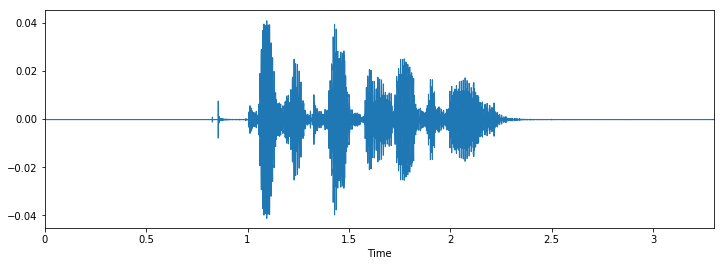

In [19]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(y,sr)
plt.show()

In [22]:
import seaborn as sns
sns.set(color_codes=True)

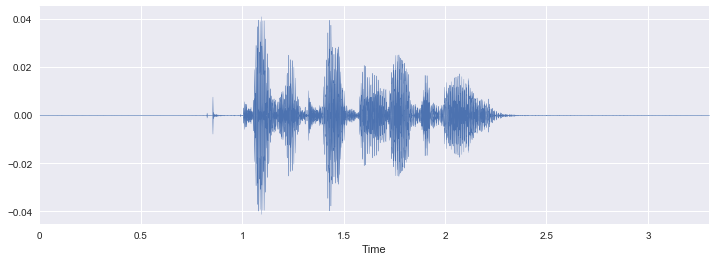

In [71]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(y,sr)
plt.show()

In [89]:
tempo, frames = librosa.beat.beat_track(y=y,sr=sr)
tempo

80.74951171875

In [60]:
beat_times = librosa.frames_to_time(frames, sr=sr)

In [87]:
onset_strength = librosa.onset.onset_strength(y=y,sr=sr)
onset_detect = librosa.onset.onset_detect(onset_strength,sr=sr)

In [129]:
#tempo, beats = librosa.beat.beat_track(y=y,sr=sr)
#beat_times = librosa.frames_to_time(beats, sr=sr)

onset_env = librosa.onset.onset_strength(y, sr=sr)#,aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env,sr=sr)
beat_times = librosa.frames_to_time(beats, sr=sr)

#onset_env = librosa.onset.onset_strength(y=y,sr=sr)
#onset_frames = librosa.onset.onset_detect(onset_envelope=onset_env, sr=sr)

print(tempo)
print(beats)
print(beat_times)

151.999080882
[27 44 59 76]
[ 0.62693878  1.021678    1.36997732  1.76471655]


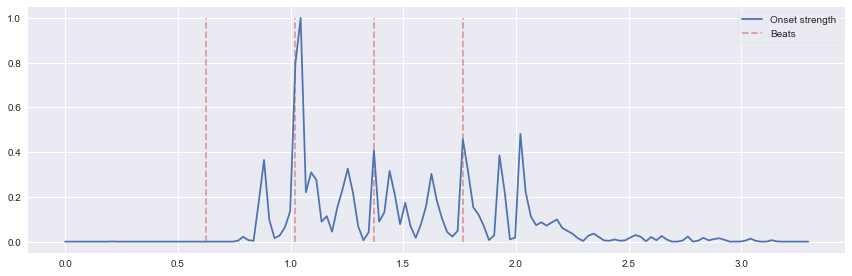

In [141]:
hop_length = 512
plt.figure(figsize=(12, 4))
times = librosa.frames_to_time(np.arange(len(onset_env)),sr=sr, hop_length=hop_length)
plt.plot(times, librosa.util.normalize(onset_env),label='Onset strength')
plt.vlines(times[beats], 0, 1, alpha=0.5, color='r',linestyle='--', label='Beats')
plt.legend(frameon=True, framealpha=0.75)
# Limit the plot to a 15-second window
#plt.xlim(0, 3)
#plt.gca().xaxis.set_major_formatter(librosa.display.TimeFormatter())
plt.tight_layout()
plt.show()

In [104]:
o_env = librosa.onset.onset_strength(y, sr=sr)
times = librosa.frames_to_time(np.arange(len(o_env)), sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

C:\Users\cyborg\Anaconda3\lib\site-packages\librosa\core\spectrum.py:863: UserWarning: power_to_db was called on complex input so phase information will be discarded. To suppress this warning, call power_to_db(magphase(D, power=2)[0]) instead.
  warnings.warn('power_to_db was called on complex input so phase '


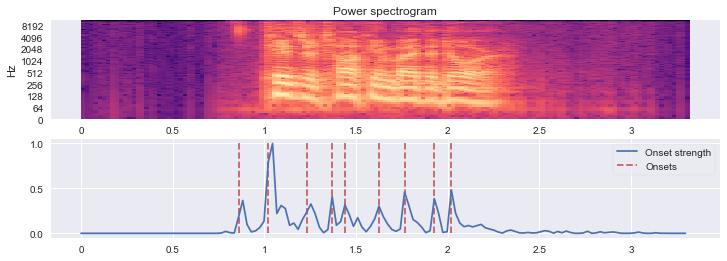

In [138]:
D = librosa.stft(y)
plt.figure(figsize=(12, 4))
ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.power_to_db(D, ref=np.max),x_axis='time', y_axis='log')
plt.title('Power spectrogram')
plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(times, o_env, label='Onset strength')
plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9, linestyle='--', label='Onsets')
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)
plt.show()

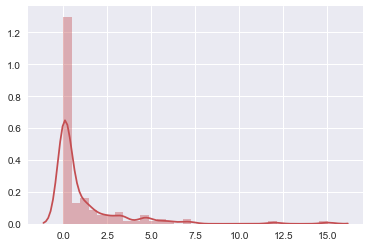

In [88]:
sns.distplot(onset_strength)
plt.show()

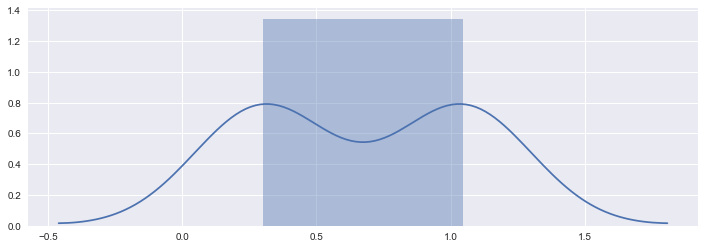

In [70]:
plt.figure(figsize=(12, 4))
#librosa.display.specshow(y)
#librosa.display.specshow(y,sr)
sns.distplot(beat_times)
plt.show()

In [73]:
mel_y = librosa.feature.melspectrogram(y=y,sr=sr)

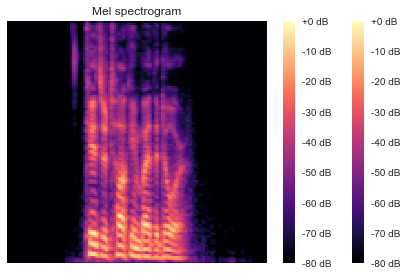

In [75]:
librosa.display.specshow(librosa.power_to_db(mel_y,ref=np.max))#, y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

In [77]:
plt.plot(y,sr)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (72838,) and (1,)

In [142]:
pathAudio = 'C:\\Users\\cyborg\\Downloads\\RAVDESS\\.'
files = librosa.util.find_files(pathAudio, ext=['wav']) 
files = np.asarray(files)
for y in files: 
    data = librosa.load(y, sr, mono = True)   
    data = data[0]     
    librosa.display.waveplot(data)

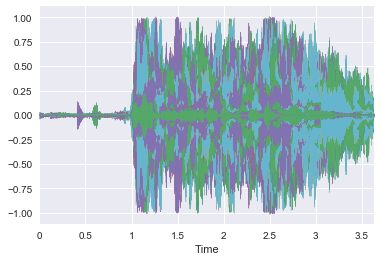

In [147]:
librosa.display.waveplot(data)
plt.show()

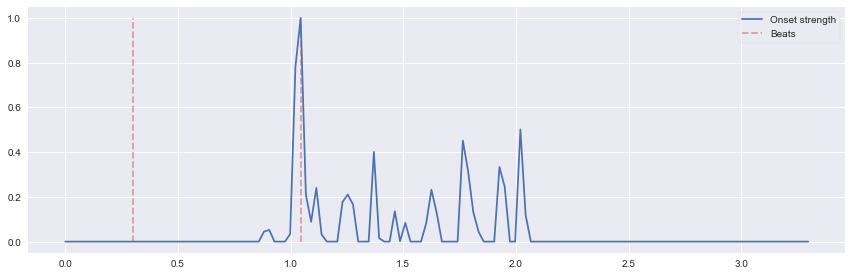

C:\Users\cyborg\Anaconda3\lib\site-packages\librosa\core\spectrum.py:863: UserWarning: power_to_db was called on complex input so phase information will be discarded. To suppress this warning, call power_to_db(magphase(D, power=2)[0]) instead.
  warnings.warn('power_to_db was called on complex input so phase '


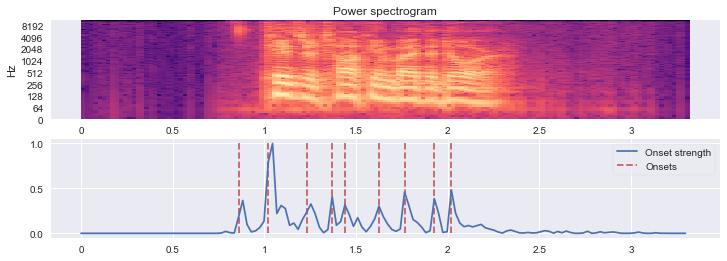

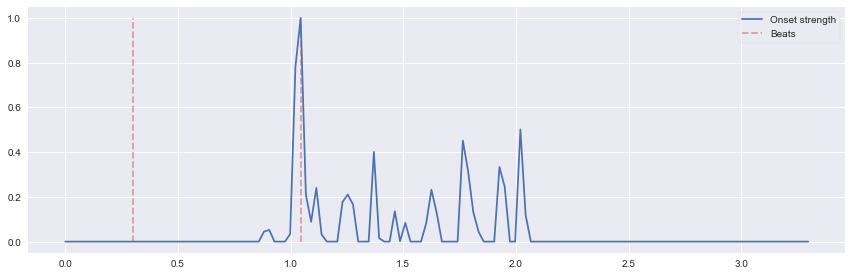

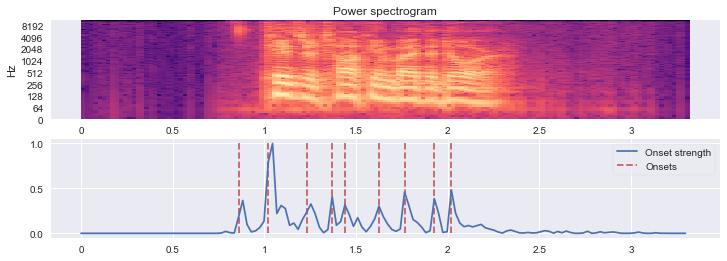

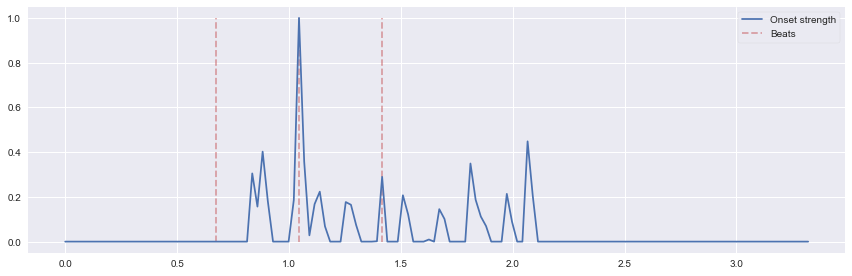

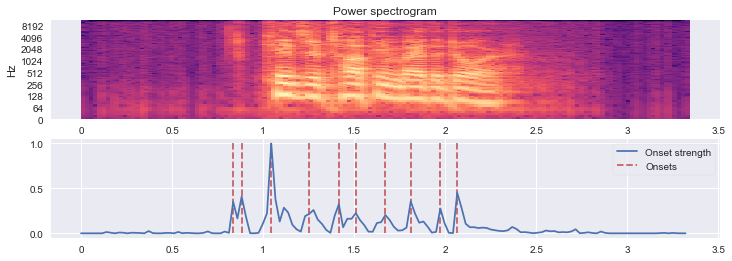

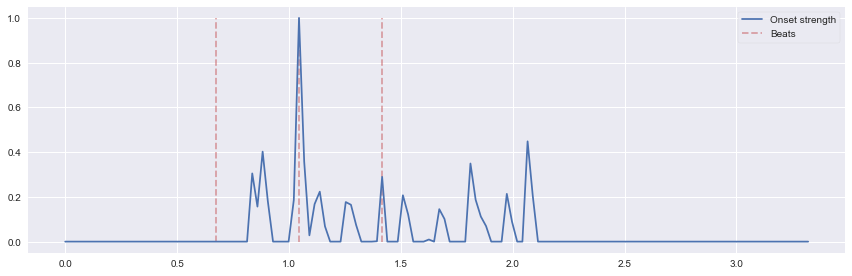

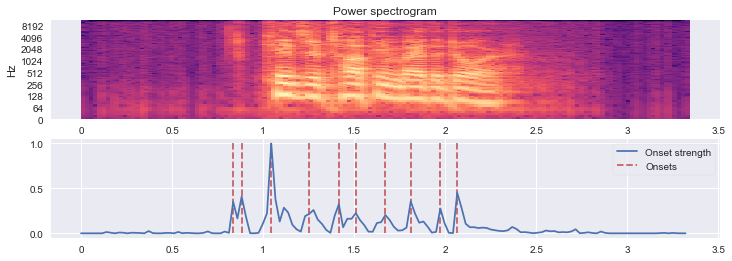

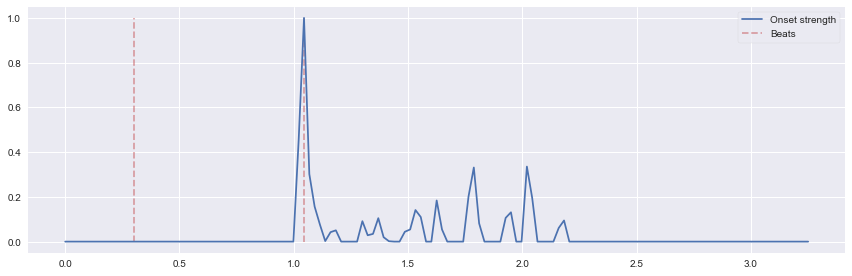

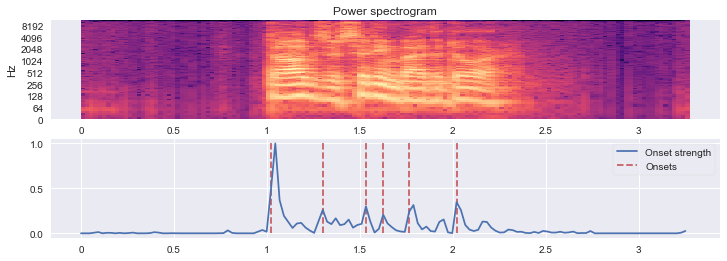

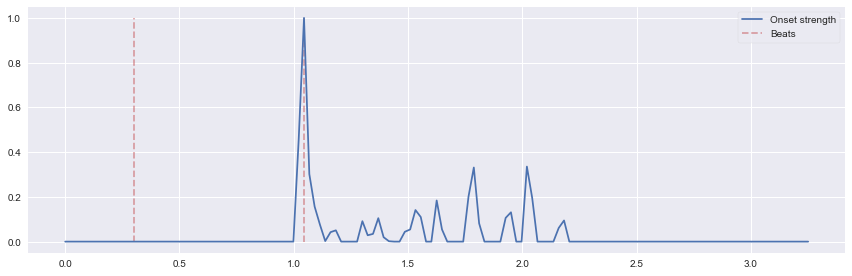

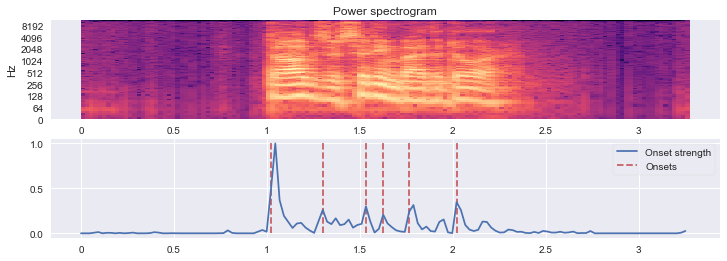

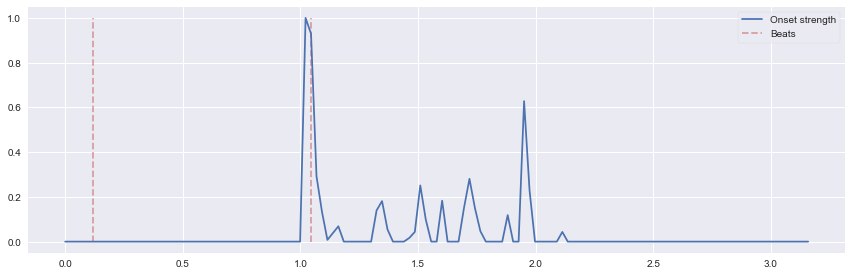

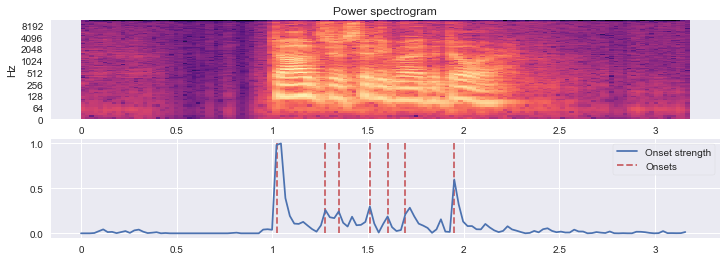

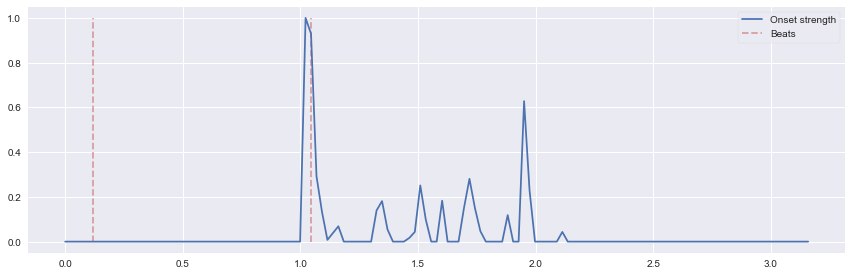

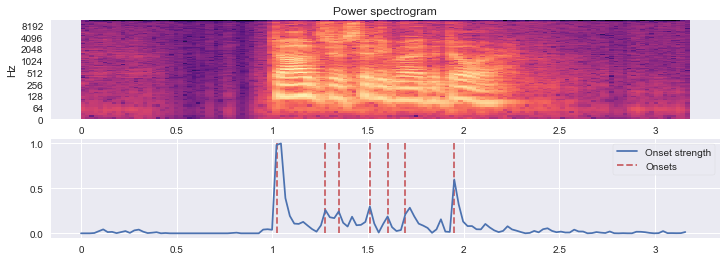

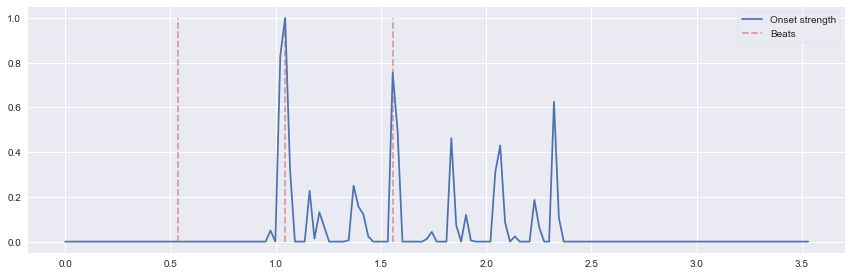

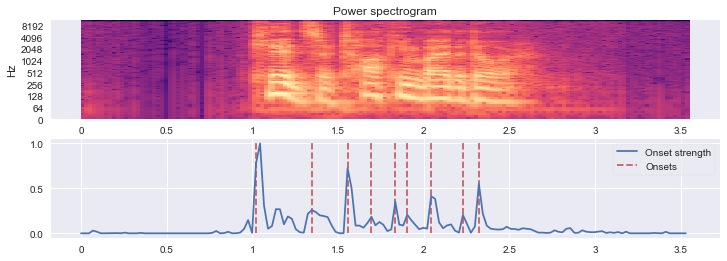

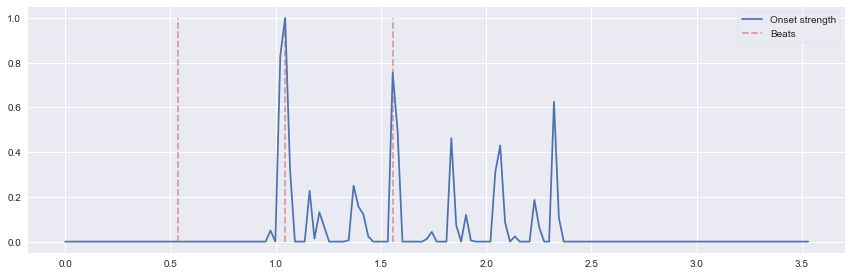

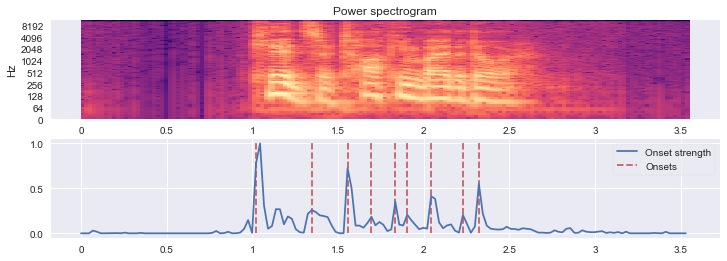

In [154]:
for file in files[:10]:
    y,sr = librosa.load(file)
    
    onset_env = librosa.onset.onset_strength(y, sr=sr,aggregate=np.median)
    tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env,sr=sr)
    beat_times = librosa.frames_to_time(beats, sr=sr)

    
    hop_length = 512
    plt.figure(figsize=(12, 4))
    times = librosa.frames_to_time(np.arange(len(onset_env)),sr=sr, hop_length=hop_length)
    plt.plot(times, librosa.util.normalize(onset_env),label='Onset strength')
    plt.vlines(times[beats], 0, 1, alpha=0.5, color='r',linestyle='--', label='Beats')
    plt.legend(frameon=True, framealpha=0.75)
    # Limit the plot to a 15-second window
    #plt.xlim(0, 3)
    #plt.gca().xaxis.set_major_formatter(librosa.display.TimeFormatter())
    plt.tight_layout()
    plt.show()
    
    
    o_env = librosa.onset.onset_strength(y, sr=sr)
    times = librosa.frames_to_time(np.arange(len(o_env)), sr=sr)
    onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)
    
    D = librosa.stft(y)
    plt.figure(figsize=(12, 4))
    ax1 = plt.subplot(2, 1, 1)
    librosa.display.specshow(librosa.power_to_db(D, ref=np.max),x_axis='time', y_axis='log')
    plt.title('Power spectrogram')
    plt.subplot(2, 1, 2, sharex=ax1)
    plt.plot(times, o_env, label='Onset strength')
    plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9, linestyle='--', label='Onsets')
    plt.axis('tight')
    plt.legend(frameon=True, framealpha=0.75)
    plt.show()
    
    
    #librosa.display.waveplot(y,sr)
    #plt.show()